## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1          X2        X3         X4         Y
0  91.347988  850.670888  0.819338  10.680631  1.398337
1  35.742644  581.659937  0.524482   2.702976  1.493977
2  30.323991  770.378995  0.257533   8.813422  1.408909
3   7.500680  680.904536  0.586174   1.789723  1.455082
4  18.670568  640.300062  0.711551   5.696238  1.613136


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9792086	total: 67ms	remaining: 1m 6s
1:	learn: 0.9713164	total: 67.5ms	remaining: 33.7s
2:	learn: 0.9635156	total: 68.3ms	remaining: 22.7s
3:	learn: 0.9546806	total: 68.9ms	remaining: 17.2s
4:	learn: 0.9467200	total: 69.5ms	remaining: 13.8s
5:	learn: 0.9398174	total: 70ms	remaining: 11.6s
6:	learn: 0.9301860	total: 70.4ms	remaining: 9.98s
7:	learn: 0.9210828	total: 71ms	remaining: 8.8s
8:	learn: 0.9136084	total: 71.5ms	remaining: 7.87s
9:	learn: 0.9065648	total: 71.9ms	remaining: 7.12s
10:	learn: 0.9010072	total: 72.4ms	remaining: 6.51s
11:	learn: 0.8936648	total: 72.8ms	remaining: 6s
12:	learn: 0.8857048	total: 73.3ms	remaining: 5.57s
13:	learn: 0.8779061	total: 73.7ms	remaining: 5.19s
14:	learn: 0.8681307	total: 74.2ms	remaining: 4.87s
15:	learn: 0.8612625	total: 74.8ms	remaining: 4.6s
16:	learn: 0.8529497	total: 75.2ms	remaining: 4.35s
17:	learn: 0.8472105	total: 75.6ms	remaining: 4.13s
18:	learn: 0.8428394	total: 76ms	remaining: 3.92s
19:	l

116:	learn: 0.4216152	total: 118ms	remaining: 891ms
117:	learn: 0.4184391	total: 119ms	remaining: 887ms
118:	learn: 0.4158441	total: 119ms	remaining: 881ms
119:	learn: 0.4141418	total: 119ms	remaining: 876ms
120:	learn: 0.4112385	total: 120ms	remaining: 871ms
121:	learn: 0.4088141	total: 120ms	remaining: 865ms
122:	learn: 0.4063302	total: 121ms	remaining: 860ms
123:	learn: 0.4046188	total: 121ms	remaining: 854ms
124:	learn: 0.4017965	total: 121ms	remaining: 850ms
125:	learn: 0.3990504	total: 122ms	remaining: 844ms
126:	learn: 0.3962220	total: 122ms	remaining: 839ms
127:	learn: 0.3939026	total: 122ms	remaining: 834ms
128:	learn: 0.3916259	total: 123ms	remaining: 830ms
129:	learn: 0.3892510	total: 123ms	remaining: 825ms
130:	learn: 0.3877495	total: 124ms	remaining: 821ms
131:	learn: 0.3851675	total: 124ms	remaining: 817ms
132:	learn: 0.3834463	total: 125ms	remaining: 813ms
133:	learn: 0.3810472	total: 125ms	remaining: 809ms
134:	learn: 0.3790437	total: 126ms	remaining: 805ms
135:	learn: 

271:	learn: 0.1963606	total: 187ms	remaining: 500ms
272:	learn: 0.1956041	total: 187ms	remaining: 499ms
273:	learn: 0.1945263	total: 188ms	remaining: 498ms
274:	learn: 0.1938925	total: 188ms	remaining: 496ms
275:	learn: 0.1929263	total: 189ms	remaining: 495ms
276:	learn: 0.1920105	total: 189ms	remaining: 494ms
277:	learn: 0.1911183	total: 190ms	remaining: 493ms
278:	learn: 0.1899650	total: 190ms	remaining: 491ms
279:	learn: 0.1892541	total: 191ms	remaining: 490ms
280:	learn: 0.1885195	total: 191ms	remaining: 489ms
281:	learn: 0.1879190	total: 192ms	remaining: 488ms
282:	learn: 0.1870681	total: 192ms	remaining: 487ms
283:	learn: 0.1864213	total: 193ms	remaining: 485ms
284:	learn: 0.1857423	total: 193ms	remaining: 484ms
285:	learn: 0.1850743	total: 193ms	remaining: 483ms
286:	learn: 0.1843826	total: 194ms	remaining: 481ms
287:	learn: 0.1835232	total: 194ms	remaining: 480ms
288:	learn: 0.1824331	total: 195ms	remaining: 479ms
289:	learn: 0.1818659	total: 195ms	remaining: 477ms
290:	learn: 

536:	learn: 0.0647975	total: 301ms	remaining: 259ms
537:	learn: 0.0645470	total: 301ms	remaining: 259ms
538:	learn: 0.0643016	total: 302ms	remaining: 258ms
539:	learn: 0.0640172	total: 302ms	remaining: 257ms
540:	learn: 0.0638278	total: 302ms	remaining: 257ms
541:	learn: 0.0635510	total: 303ms	remaining: 256ms
542:	learn: 0.0632510	total: 303ms	remaining: 255ms
543:	learn: 0.0629816	total: 303ms	remaining: 254ms
544:	learn: 0.0628013	total: 304ms	remaining: 254ms
545:	learn: 0.0625392	total: 304ms	remaining: 253ms
546:	learn: 0.0622514	total: 305ms	remaining: 252ms
547:	learn: 0.0619981	total: 305ms	remaining: 252ms
548:	learn: 0.0618012	total: 305ms	remaining: 251ms
549:	learn: 0.0616633	total: 306ms	remaining: 250ms
550:	learn: 0.0614953	total: 306ms	remaining: 250ms
551:	learn: 0.0612477	total: 307ms	remaining: 249ms
552:	learn: 0.0610916	total: 307ms	remaining: 248ms
553:	learn: 0.0609021	total: 308ms	remaining: 248ms
554:	learn: 0.0607496	total: 308ms	remaining: 247ms
555:	learn: 

687:	learn: 0.0393286	total: 369ms	remaining: 167ms
688:	learn: 0.0392350	total: 369ms	remaining: 167ms
689:	learn: 0.0391549	total: 370ms	remaining: 166ms
690:	learn: 0.0390629	total: 371ms	remaining: 166ms
691:	learn: 0.0388910	total: 371ms	remaining: 165ms
692:	learn: 0.0387216	total: 372ms	remaining: 165ms
693:	learn: 0.0385547	total: 372ms	remaining: 164ms
694:	learn: 0.0383903	total: 373ms	remaining: 163ms
695:	learn: 0.0382283	total: 373ms	remaining: 163ms
696:	learn: 0.0380687	total: 373ms	remaining: 162ms
697:	learn: 0.0379643	total: 374ms	remaining: 162ms
698:	learn: 0.0378078	total: 374ms	remaining: 161ms
699:	learn: 0.0376536	total: 374ms	remaining: 160ms
700:	learn: 0.0374968	total: 375ms	remaining: 160ms
701:	learn: 0.0374117	total: 376ms	remaining: 159ms
702:	learn: 0.0371835	total: 376ms	remaining: 159ms
703:	learn: 0.0370206	total: 376ms	remaining: 158ms
704:	learn: 0.0369382	total: 377ms	remaining: 158ms
705:	learn: 0.0367892	total: 377ms	remaining: 157ms
706:	learn: 

945:	learn: 0.0204729	total: 482ms	remaining: 27.5ms
946:	learn: 0.0204352	total: 483ms	remaining: 27ms
947:	learn: 0.0203620	total: 483ms	remaining: 26.5ms
948:	learn: 0.0203321	total: 483ms	remaining: 26ms
949:	learn: 0.0202598	total: 484ms	remaining: 25.5ms
950:	learn: 0.0201883	total: 484ms	remaining: 24.9ms
951:	learn: 0.0201216	total: 484ms	remaining: 24.4ms
952:	learn: 0.0200700	total: 485ms	remaining: 23.9ms
953:	learn: 0.0200404	total: 485ms	remaining: 23.4ms
954:	learn: 0.0199700	total: 486ms	remaining: 22.9ms
955:	learn: 0.0199197	total: 486ms	remaining: 22.4ms
956:	learn: 0.0198493	total: 486ms	remaining: 21.9ms
957:	learn: 0.0197839	total: 487ms	remaining: 21.3ms
958:	learn: 0.0197348	total: 487ms	remaining: 20.8ms
959:	learn: 0.0196867	total: 488ms	remaining: 20.3ms
960:	learn: 0.0196186	total: 488ms	remaining: 19.8ms
961:	learn: 0.0195503	total: 488ms	remaining: 19.3ms
962:	learn: 0.0195029	total: 489ms	remaining: 18.8ms
963:	learn: 0.0194356	total: 489ms	remaining: 18.3

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


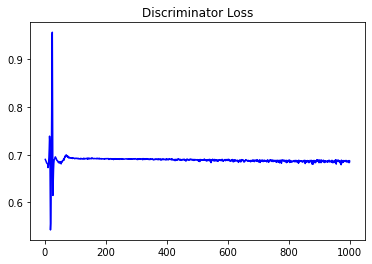

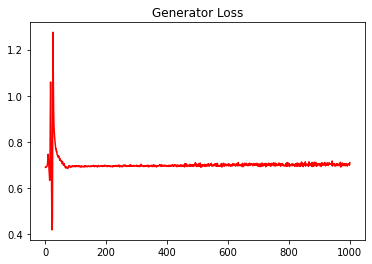

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.24256083950545684


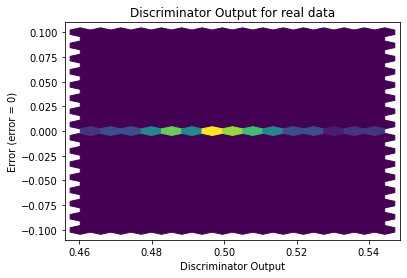

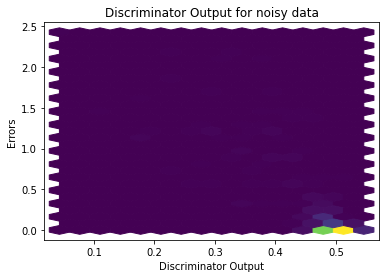

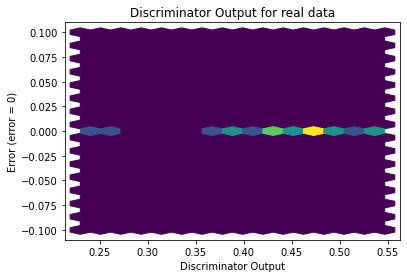

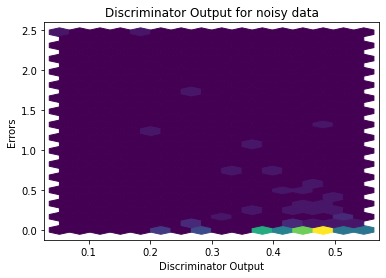

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8267]], requires_grad=True)
